In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 레이블 벡터 변환
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
# keras 내장 함수
# from keras.utils.np_utils  import to_categorical

# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [6]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 254us/step - loss: 2.5310 - acc: 0.4957 - val_loss: 1.7243 - val_acc: 0.6090
Epoch 2/20
7982/7982 [==============================] - 1s 176us/step - loss: 1.4499 - acc: 0.6868 - val_loss: 1.3491 - val_acc: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s 177us/step - loss: 1.0982 - acc: 0.7646 - val_loss: 1.1729 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.8720 - acc: 0.8157 - val_loss: 1.0820 - val_acc: 0.7570
Epoch 5/20
7982/7982 [==============================] - 2s 193us/step - loss: 0.7053 - acc: 0.8477 - val_loss: 0.9852 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 2s 205us/step - loss: 0.5673 - acc: 0.8800 - val_loss: 0.9421 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 2s 199us/step - loss: 0.4588 - a

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

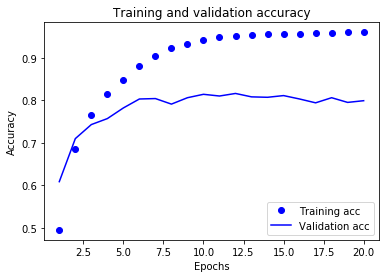

In [8]:
# 코드 3-10 훈련과 검증 정확도 그리기 (이미지 저장으로 변경)
history_dict = history.history
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig2 = plt.gcf()

plt.draw()
fig2.savefig('fig2.png', dpi=100)

In [9]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 238us/step - loss: 2.5396 - acc: 0.5227 - val_loss: 1.6729 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 2s 192us/step - loss: 1.3716 - acc: 0.7121 - val_loss: 1.2766 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 186us/step - loss: 1.0147 - acc: 0.7780 - val_loss: 1.1301 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 2s 192us/step - loss: 0.7980 - acc: 0.8262 - val_loss: 1.0528 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 2s 203us/step - loss: 0.6393 - acc: 0.8629 - val_loss: 0.9744 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 2s 204us/step - loss: 0.5110 - acc: 0.8925 - val_loss: 0.9097 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 2s 207us/step - loss: 0.4108 - acc: 0.9151 - val_loss: 0.8916 - val_acc: 0.8210
Epoch 8

In [10]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)


In [11]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])